# Plot Correlation

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/']
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

In [2]:
import postproengine as ppeng

import ruamel.yaml    
yaml2 = ruamel.yaml.YAML(typ='rt')
Loader= yaml2.load
loaderkwargs = {}
dumperkwargs = {}

In [3]:
yamlstring="""
globalattributes:
  verbose: True
  udfmodules: 
  - spectrapoints.py
  executeorder:
# - instantaneousplanes
  - correlate
  - plotcsv
    
correlate:
  - name: two-point correlation (WRF-LES)
    ncfile: wrf.nc
    group: plane
    timerange: [0, 600]
    iplane: 1
    probelength: 1100
    probelocationfunction: spectrapoints.probelocations
    plotprobept: True
    saveprefix: correlation
    integrallengthscale:
      savefile: lengthscale.yaml

plotcsv:
  - name: plotRij
    xlabel: xi [m]
    ylabel: '$R_{ij}(xi)$'
    title: 'Two point correlation'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    #postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLong', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Longitudinal'}}
    - {'file':'correlation.AVG_Rij.csv', 'xcol':'xi', 'ycol':'RijLat',  'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'Lateral'}}
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized correlate
Running correlate
wrf.nc 601
[============================================================] 100.0% 
Ncount = 601

WS   = [6.137318755033852, 0.4047298932065868, -0.002102326577065722]
Wdir = 266.2270516544992
356.23
[============================================================] 100.0% 
Initialized integrallengthscale inside correlate
Executing integrallengthscale
LONG lengthscale = 184.286767
LAT lengthscale  = 45.709869
Initialized plotcsv
Running plotcsv


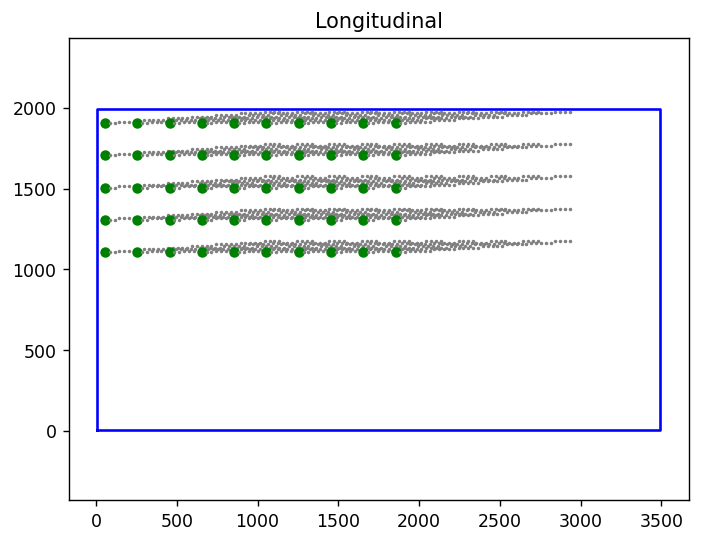

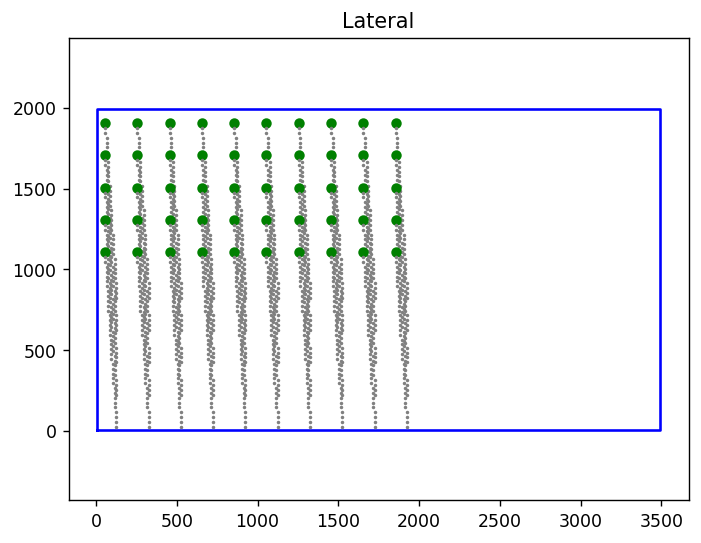

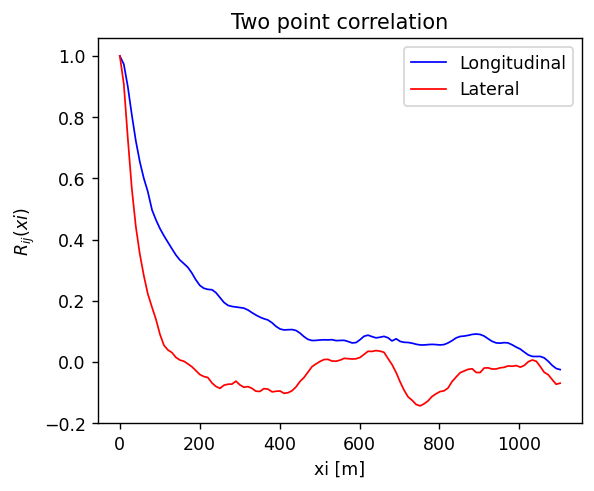

In [4]:
# Run the driver
ppeng.driver(yamldict, verbose=True)